<h1 style="text-align: center;"><b>UBC_OCEAN Classification Report</b></h1>

<p style="text-align: right; font-weight: bold;">
  2025.06.27<br>
  Team 'Common_Lab' | Tae-hui Sung, Ye-ji Jin, Do-il Kwon
</p>

# **1. Introduction**

<h2>1.1. Problem Statement</h2>
<p>Pathologists analyze tissue biopsy images from ovarian cancer patients to determine tumor characteristics and accurately classify cancer subtypes. Ovarian cancer includes a variety of subtypes—such as high-grade serous carcinoma (HGSC), low-grade serous carcinoma (LGSC), mucinous carcinoma (MC), endometrioid carcinoma (EC), and clear cell carcinoma (CCC)—each associated with distinct prognoses and treatment responses. Thus, precise subtype classification is critical for clinical decision-making.</p>
<p>However, this process currently relies heavily on manual interpretation by experienced pathologists, making it time-consuming and subject to inter-observer variability.</p>
<p>To address these challenges, this project explores the use of deep learning-based models to automatically classify ovarian cancer subtypes from biopsy images. By automating the annotation and interpretation process, we aim to reduce the workload of medical professionals while enhancing the accuracy and efficiency of ovarian cancer diagnosis.</p>

<h2>1.1. 문제 정의</h2>
<p>병리학자들은 난소암 환자로부터 수집된 조직 생검 이미지를 분석하여 종양의 특성과 아형(subtype)을 진단합니다. 난소암은 고등급 장액성암(HGSC), 저등급 장액성암(LGSC), 점액성암(MC), 자궁내막암(EC), 명세포암(CCC) 등 다양한 아형이 존재하며, 각 아형은 예후와 치료 반응이 상이하므로 정확한 분류가 임상적 의사결정에 매우 중요합니다.</p>
<p>그러나 아형 분류를 위한 조직 이미지 판독은 숙련된 병리 전문의의 지식과 경험에 의존하는 수작업이 대부분이며, 이 과정은 시간이 오래 걸리고, 일관성 확보가 어렵다는 한계를 가지고 있습니다.</p>
<p>이러한 문제를 해결하고자, 본 프로젝트는 딥러닝 기반의 모델을 활용하여 생검 이미지를 자동으로 분류하는 방법을 탐색합니다. 이를 통해 의료진의 부담을 줄이고, 난소암 아형 진단의 효율성과 정확성을 동시에 향상시키는 것을 목표로 합니다.</p>

<hr>


<h2>1.2. Methodology Overview: Project Pipeline</h2>
<p>This project adopts a structured three-stage pipeline designed to optimize ovarian cancer subtype classification from whole-slide biopsy images, leveraging patch-level feature extraction, graph-based representation, and deep learning. The details of each phase are as follows:</p>
<p><strong>1. Data Preprocessing and Feature Extraction (Section 2 & 3)</strong><br>
To handle the gigapixel scale of whole-slide biopsy images (WSIs), we divide each image into uniform-sized patches (e.g., 256×256). Patches are filtered to remove background and uninformative regions based on pixel intensity thresholds.<br>
Each retained patch is converted to a fixed-size feature vector using a pretrained CNN (e.g., ResNet-18), with the extracted features and corresponding spatial coordinates stored in efficient HDF5 format.<br>
Additionally, patch-to-patch spatial relationships are computed by identifying 8-neighbor adjacency (left, right, up, down, and diagonals), enabling graph construction for the downstream AttriMIL model.</p>
<p><strong>2. Graph-based AttriMIL Training and Evaluation (Section 4–8)</strong><br>
We adopt a Multiple Instance Learning (MIL) framework using <strong>AttriMIL</strong>, where each slide (bag) is composed of multiple patch-level features (instances).<br>
The patch adjacency graph models spatial dependencies via Graph Neural Networks (GNNs), while the attention-based mechanism of AttriMIL learns to assign diagnostic relevance to each patch. AttriMIL is chosen for its demonstrated effectiveness in computational pathology tasks, particularly for its ability to incorporate both instance-level attention and graph-based spatial structure. Unlike traditional MIL approaches that treat instances independently, AttriMIL leverages a dual-stream architecture combining node-wise features and topological relationships. This makes it well-suited for WSI-level classification tasks where both local patterns and spatial context are essential for accurate diagnosis.</p>
<p><strong>3. End-to-End Prediction and Pathology Integration (Section 9)</strong><br>
In clinical pathology settings, each WSI may contain multiple heterogeneous regions. Our system enables region-wise subtype prediction by combining AttriMIL-based classification with spatial context modeling.<br>
This allows for end-to-end, slide-level subtype prediction, with outputs visualizable as heatmaps or interpretable ROI-based classifications, facilitating real-world deployment in diagnostic workflows.</p>

<h2>1.2. 방법론 개요: 프로젝트 파이프라인</h2>
<p>본 프로젝트는 고해상도 병리 슬라이드 이미지(WSI)를 기반으로 한 난소암 아형 분류를 목표로 하며, 세 단계의 구조화된 파이프라인으로 구성됩니다:</p>
<p><strong>1. 데이터 전처리 및 특징 추출 (2장 & 3장)</strong><br>
슬라이드 이미지를 균일한 크기의 패치(예: 256×256)로 분할하고, 픽셀 분포 기준으로 배경이나 무의미한 영역을 필터링합니다.<br>
유의미한 패치에 대해 ResNet-18 등 사전학습된 CNN을 사용하여 feature를 추출하고, 좌표와 함께 HDF5 형식으로 저장합니다.<br>
각 패치 간 8방향 이웃 관계를 계산하여 AttriMIL 모델 학습에 활용될 그래프 구조를 생성합니다.</p>
<p><strong>2. 그래프 기반 AttriMIL 학습 및 평가 (4장~8장)</strong><br>
본 연구에서는 <strong>AttriMIL</strong> 단일 모델을 사용하여 MIL(Multiple Instance Learning) 방식으로 슬라이드 전체를 하나의 bag, 패치를 instance로 구성합니다.<br>
패치 간 인접 관계를 기반으로 GNN(Graph Neural Network)을 구성하고, AttriMIL의 attention 메커니즘을 통해 중요한 병리 정보를 학습합니다.
AttriMIL은 특히 병리 이미지 분석에서 효과가 입증된 모델로, 인스턴스별 주의(attention)뿐 아니라 공간적 그래프 구조를 동시에 반영할 수 있다는 점에서 채택되었습니다. 기존 MIL 방법들이 패치 간 관계를 무시한 독립적 접근을 취하는 것과 달리, AttriMIL은 노드 특징과 인접 구조를 함께 고려하는 이중 스트림 구조(dual-stream architecture)를 채택하여 WSI 기반의 병리 분류에 적합한 성능을 보입니다.</p>
<p><strong>3. 슬라이드 수준 예측 및 임상 병리 통합 (9장)</strong><br>
슬라이드 내 이질적 병변 영역을 구분하여 지역별 분류 예측이 가능하도록 구성하며, 전체 슬라이드에 대한 아형 예측을 수행합니다.<br>
결과는 ROI 기반 heatmap 또는 해석 가능한 형태로 시각화 가능하며, 실제 진단에 활용 가능한 워크플로우로 확장됩니다.</p>

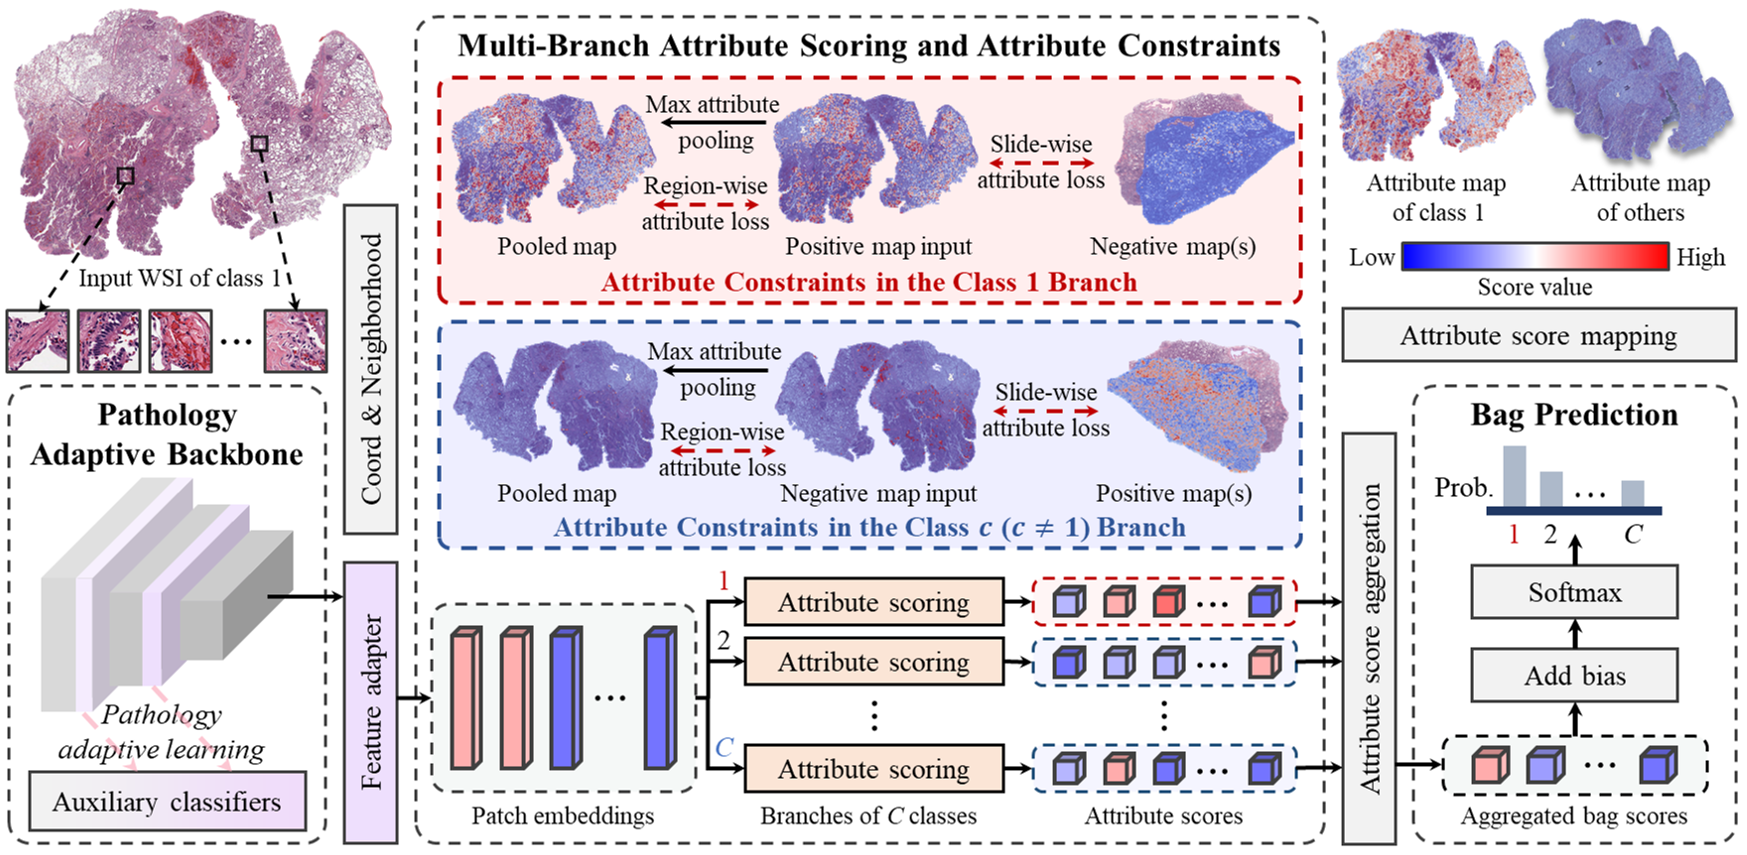
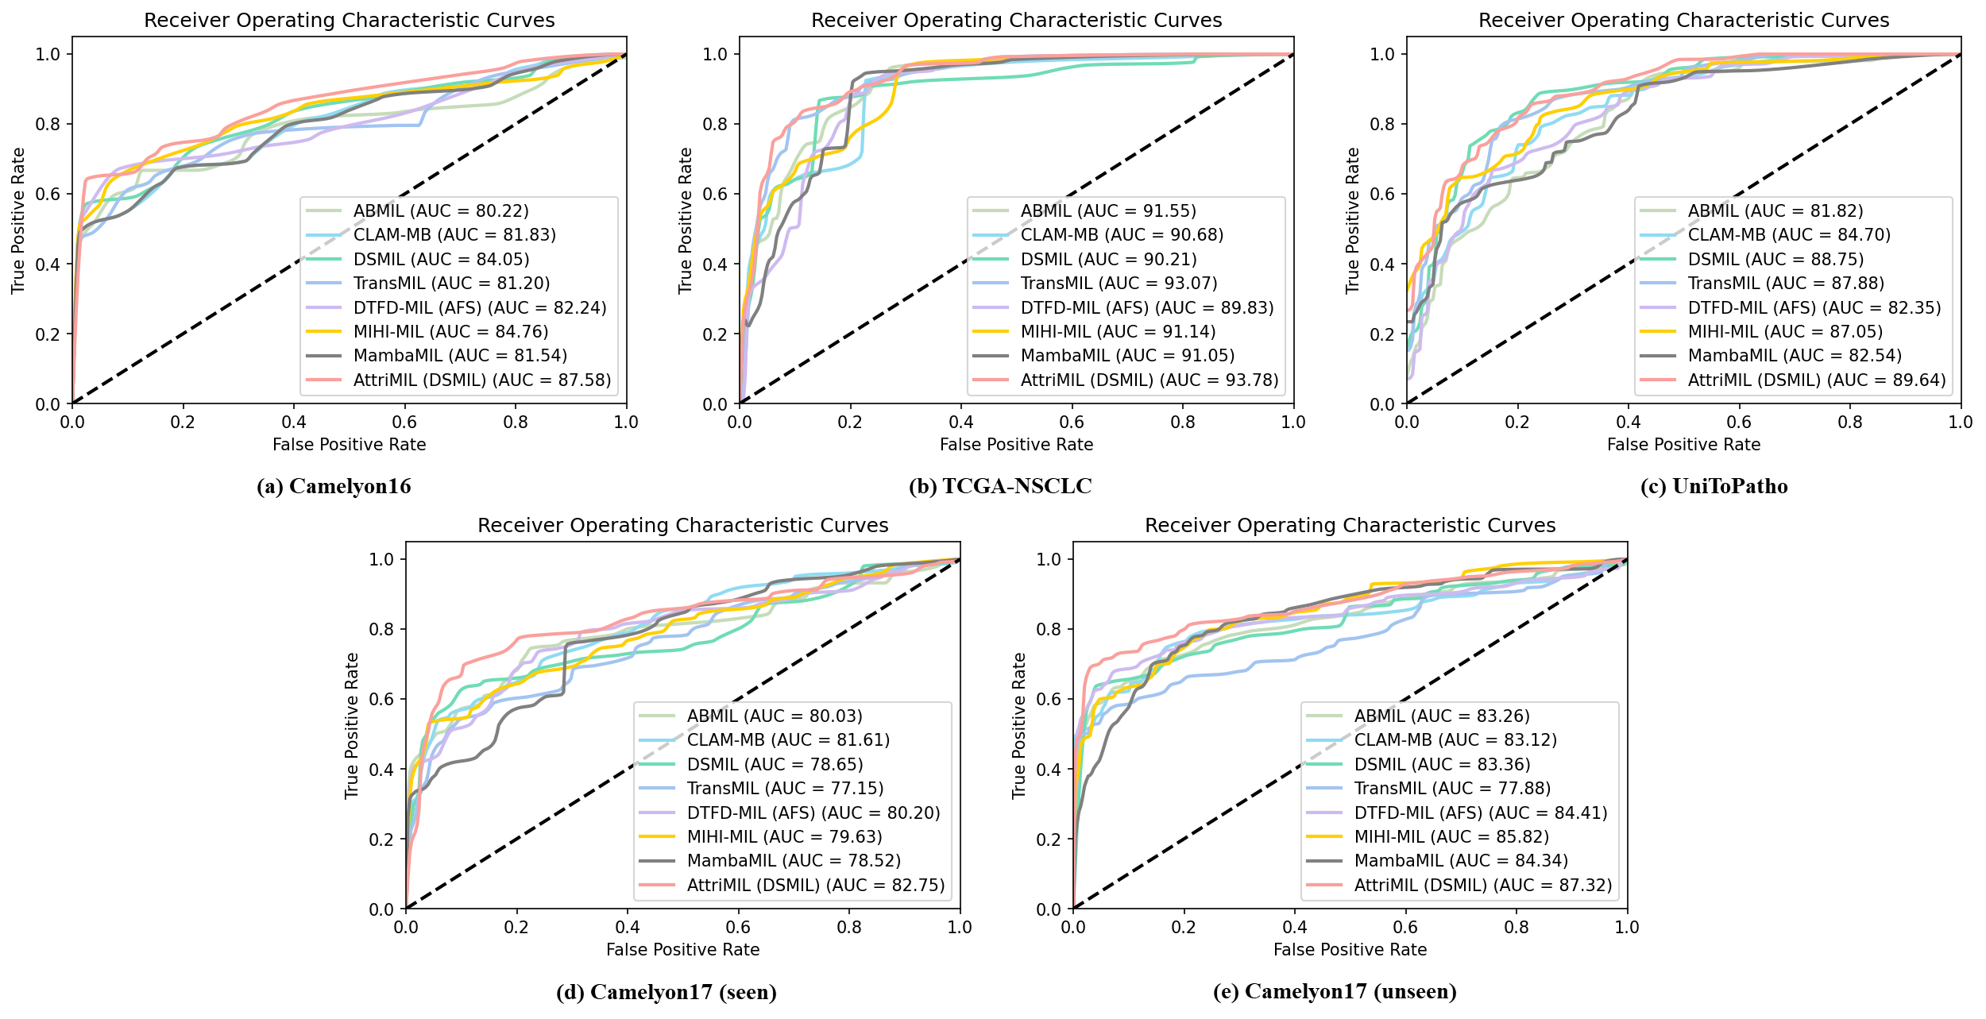

<hr>

# **2. Data Preprocessing**

<h2>2.1. Dataset Information</h2>

<p>This project aims to automate the classification of ovarian cancer subtypes using a dataset composed of histopathology biopsy images collected from various medical and research institutions worldwide. The dataset is considered one of the largest and most heterogeneous histopathological image collections ever assembled for ovarian cancer research, representing the morphological diversity across subtypes.</p>
<p>All images are stained using hematoxylin and eosin (H&E) and are annotated across five categories: high-grade serous carcinoma (HGSC), low-grade serous carcinoma (LGSC), clear cell carcinoma (CCC), endometrioid carcinoma (EC), and mucinous carcinoma (MC). Since each subtype presents distinct cellular architecture, genomic profiles, prognoses, and treatment responses, precise classification is crucial for personalized therapy.</p>
<p>The dataset varies significantly in image resolution and file size. Image files range from approximately 10MB to 5GB, encompassing both traditional pathology images and full whole slide images (WSI). Pixel resolutions and magnification levels differ between slides, depending on scanning protocols and equipment, which introduces variability that must be carefully addressed during preprocessing.</p>
<p>Due to ethical, technical, and financial limitations, expanding the dataset is currently infeasible. Therefore, this study focuses on fully leveraging the existing high-quality and diverse pathology image data to explore the feasibility of automating ovarian cancer subtype classification.</p>

<h2>2.1. 데이터셋 정보</h2>
<p>본 프로젝트는 난소암 아형 자동 분류를 목표로 하며, 이에 사용된 데이터셋은 전 세계 여러 의료 기관과 연구 기관에서 수집된 <em>병리학적 생검 이미지(histopathology biopsy images)</em>로 구성되어 있습니다. 이 데이터셋은 난소암 아형 간의 형태학적 차이를 반영한 세계 최대 규모이자 가장 이질적인 병리 영상 컬렉션 중 하나로 평가됩니다.</p>
<p>이미지는 H&E 염색을 기반으로 하며, 고등급 장액성암(HGSC), 저등급 장액성암(LGSC), 명세포암(CCC), 자궁내막암(EC), 점액성암(MC) 등 총 5개 주요 아형으로 라벨링되어 있습니다. 각 아형은 세포 구조, 유전적 프로파일, 예후와 치료 반응이 다르기 때문에 정밀한 분류는 환자 맞춤형 치료의 핵심입니다.</p>
<p>데이터의 해상도와 크기는 매우 다양합니다. 이미지 크기는 약 10MB에서 최대 5GB까지 분포하며, 이는 전통적인 병리 이미지부터 전체 슬라이드 이미지(WSI)에 이르기까지 다양한 형식을 포함하고 있음을 의미합니다. 픽셀 해상도 또한 슬라이드마다 상이하며, 확대 배율이나 스캔 조건에 따라 차이가 존재합니다. 이러한 이질성은 전처리 과정에서 특별한 고려가 필요하게 만듭니다.</p>
<p>윤리적, 기술적, 재정적 제약으로 인해 현재 데이터의 확장 수집은 어려운 상황이며, 본 연구는 기존에 공개된 고품질 병리 이미지 자료에 기반하여 난소암 아형 분류의 자동화 가능성을 탐색합니다.</p>

<hr>

<h2>2.2. Preprocessing Steps</h2>
<strong>1. Labeling Strategy</strong><br>
- Each image is labeled with a single ovarian cancer subtype: high-grade serous (HGSC), low-grade serous (LGSC), clear cell (CCC), endometrioid (EC), or mucinous carcinoma (MC).<br>
- No spatial annotations such as lesion locations, region-of-interest (ROI), or segmentation masks are provided. Therefore, the classification model is trained using only slide-level labels under a weakly supervised <strong>AttriMIL</strong> framework.<br>
- Each whole-slide image is treated as a bag, and the extracted image patches as instances, with patch-level relevance learned during training.
<br><br>
<strong>2. Format Standardization and Resolution Handling</strong><br>
- All original images are provided in PNG format, with file sizes ranging from approximately 10MB to 5GB.<br>
- Image resolution and tissue content vary significantly across slides. To standardize input, all images are converted to JPEG format with uniform quality settings.<br>
- The resolution metadata in <code>train.csv</code> is not used in preprocessing; instead, fixed-size patch tiling is uniformly applied to all slides regardless of resolution.
<br><br>
<strong>3. Input Format Unification</strong><br>
- All images are converted to JPG format during preprocessing.<br>
- This conversion is consistently applied not only to the original PNG images, but also to any additional inputs such as Whole Slide Images (WSIs) or Tissue Microarrays (TMAs), ensuring compatibility across clinical sources.
<br><br>
<strong>4. Tiling</strong><br>
- Each slide is divided into non-overlapping image patches of <strong>256×256 pixels</strong> using a fixed-grid strategy.<br>
- Patches with more than 95% black or more than 99% white pixels are removed to exclude background.<br>
- Border patches are not discarded and are retained to enable full-resolution attention map visualization later.<br>
- No stain normalization is applied at this stage, though it can optionally be added in future iterations.
<br><br>
<strong>5. Class Balance Adjustment</strong><br>
- The dataset presents a significant imbalance: for example, HGSC has 222 slides, while LGSC and MC have only 47, 46 each.<br>
- No oversampling, undersampling, or augmentation is performed during preprocessing.<br>
- Instead, class imbalance is addressed during model training by applying strong class weights in the loss function to penalize errors on underrepresented subtypes.

<h2>2.2. 전처리 단계</h2>
<strong>1. 라벨링 전략</strong><br>
- 각 이미지는 하나의 난소암 아형(high-grade serous (HGSC), low-grade serous (LGSC), clear cell (CCC), endometrioid (EC), mucinous carcinoma (MC))으로 라벨링되어 있습니다.<br>
- 병변 위치, ROI(관심 영역), 또는 세분화 마스크(segmentation mask)와 같은 공간 주석은 제공되지 않으므로, 본 연구에서는 슬라이드 수준의 라벨만을 기반으로 약지도(weak supervision) <strong>AttriMIL</strong> 프레임워크를 활용하여 분류 모델을 학습합니다.<br>
- 각 슬라이드는 하나의 bag으로 간주되며, 그 안의 이미지 패치들은 instance로 처리되어 학습 과정에서 중요도가 자동으로 조정됩니다.
<br><br>
<strong>2. 형식 통일 및 해상도 처리</strong><br>
- 원본 이미지는 PNG 형식이며, 파일 크기는 약 10MB에서 최대 5GB까지 다양합니다.<br>
- 슬라이드마다 해상도와 조직 분포가 상이하여 입력 형식의 표준화가 필요하며, 모든 이미지는 품질 설정을 통일하여 JPEG 형식으로 변환합니다.<br>
- <code>train.csv</code>에 포함된 해상도 정보는 본 전처리 과정에서는 사용되지 않으며, 모든 슬라이드에 대해 동일한 방식의 고정 패치 분할을 적용합니다.
<br><br>
<strong>3. 입력 포맷 통일</strong><br>
- 모든 이미지는 전처리 단계에서 JPG 포맷으로 변환됩니다.<br>
- 이 변환은 기존 PNG 이미지뿐만 아니라 향후 도입될 WSI(Whole Slide Image), TMA(Tissue Microarray) 등 다양한 임상 이미지에도 동일하게 적용되어, 데이터셋 전반의 일관성을 유지합니다.
<br><br>
<strong>4. 타일링</strong><br>
- 각 슬라이드는 <strong>256×256 픽셀</strong> 크기의 비중첩(non-overlapping) 패치로 균일하게 분할됩니다.<br>
- 전체 픽셀의 95% 이상이 검정색이거나 99% 이상이 흰색인 패치는 배경으로 간주하여 제거합니다.<br>
- 경계에 위치한 패치도 제거하지 않고 유지하며, 이는 이후 attention heatmap 시각화 시 전체 이미지 공간을 포함하기 위함입니다.<br>
- 현재 단계에서는 염색 표준화(stain normalization)는 적용되지 않았으나, 향후 단계에서 선택적으로 추가될 수 있습니다.
<br><br>
<strong>5. 클래스 불균형 조정</strong><br>
- 데이터셋에는 명확한 클래스 불균형이 존재하며, 예를 들어 HGSC는 222장, LGSC 및 MC는 각각 47, 46장에 불과합니다.<br>
- 전처리 단계에서는 오버샘플링, 언더샘플링 또는 증강을 적용하지 않았습니다.<br>
- 대신, 학습 시 손실 함수에 소수 클래스에 대한 페널티를 강화하는 방식으로 <strong>클래스별 가중치</strong>를 적용하여 불균형 문제를 완화합니다.

<hr>

<h2>2.3. Results and Analysis</h2>

<p>The final cleaned dataset consists of histopathology biopsy images representing five major subtypes of ovarian cancer. All images have been curated and preprocessed for use in supervised classification tasks. The dataset summary is as follows:</p>

<ul>
  <li><strong>Total image count</strong>: 538</li>
  <li><strong>Class distribution</strong>:
    <ul>
      <li>High-Grade Serous Carcinoma (HGSC): 222 images</li>
      <li>Endometrioid Carcinoma (EC): 124 images</li>
      <li>Clear Cell Carcinoma (CC): 99 images</li>
      <li>Low-Grade Serous Carcinoma (LGSC): 47 images</li>
      <li>Mucinous Carcinoma (MC): 46 images</li>
    </ul>
  </li>
</ul>

<p><strong>Class imbalance issue:</strong><br>
The dataset shows a significant imbalance. HGSC comprises 41.3% of all samples, while LGSC and MC each account for less than 9%.<br>
To mitigate this, we considered multiple approaches such as class weighting, resampling, or data augmentation.</p>

<p><strong>Strategy adopted:</strong><br>
Due to time constraints, <u>we did not apply augmentation or resampling during preprocessing</u>.<br>
Instead, we handled imbalance during training by applying <strong>strong class weights</strong> in the loss function to emphasize minority class learning without altering the original dataset.</p>

<hr>

<h2>2.3. 결과 및 분석</h2>

<p>최종적으로 정제된 데이터셋은 난소암의 5개 주요 아형에 대한 병리 슬라이드 이미지로 구성되며,<br>
감독 학습 기반 분류 모델 학습을 위한 전처리 및 구조화가 완료된 상태입니다. 데이터셋의 구성은 다음과 같습니다:</p>

<ul>
  <li><strong>총 이미지 수</strong>: 538장</li>
  <li><strong>아형별 이미지 수</strong>:
    <ul>
      <li>고등급 장액성암 (HGSC): 222장</li>
      <li>자궁내막암 (EC): 124장</li>
      <li>명세포암 (CC): 99장</li>
      <li>저등급 장액성암 (LGSC): 47장</li>
      <li>점액성암 (MC): 46장</li>
    </ul>
  </li>
</ul>

<p><strong>클래스 불균형 문제:</strong><br>
전체 샘플의 41.3%가 HGSC에 해당하며, LGSC와 MC는 각각 9% 이하로 현저히 적은 비율을 차지합니다.<br>
이에 따라, 클래스 불균형을 완화하기 위한 전략으로 클래스 가중치 적용, 리샘플링, 데이터 증강 등이 고려되었습니다.</p>

<p><strong>적용된 전략:</strong><br>
프로젝트의 시간 제약을 고려하여, <u>전처리 단계에서는 증강 및 리샘플링을 수행하지 않았습니다</u>.<br>
대신, 학습 단계에서 <strong>손실 함수에 클래스별 가중치를 강하게 부여</strong>하는 방식으로 불균형 문제를 해결하였습니다.<br>
이를 통해 원본 데이터를 그대로 유지하면서도 소수 클래스에 대한 학습 효과를 극대화할 수 있도록 설계하였습니다.</p>

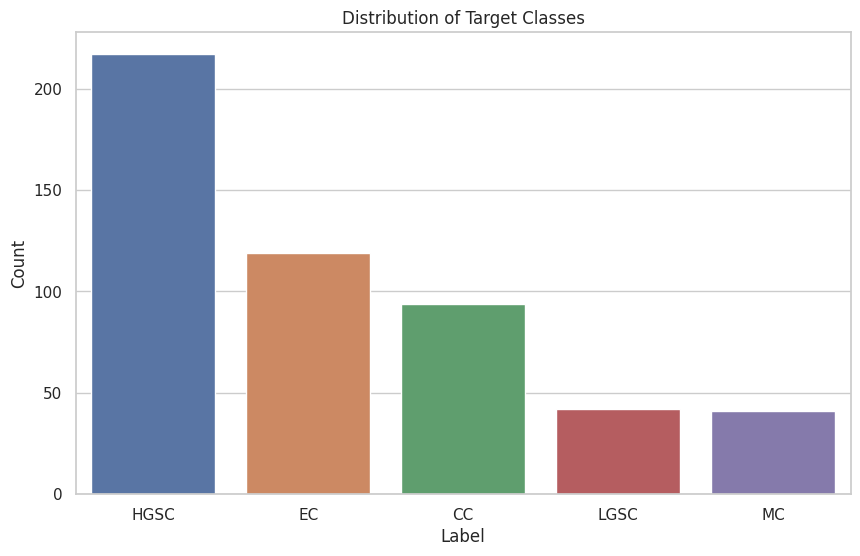

In [ ]:
import os
import zipfile
import io
import random
import numpy as np
import pandas as pd
from PIL import Image, ImageFile
from tqdm import tqdm
import imageio.v3 as iio

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [ ]:
Image.MAX_IMAGE_PIXELS = None
ImageFile.LOAD_TRUNCATED_IMAGES = True

# ====== 설정값 =======
zip_path = "D:/UBC-OCEAN datasets/UBC_OCEAN1.zip"
output_base_dir = "D:/UBC-OCEAN/Data"
csv_path = "D:/UBC-OCEAN datasets/train.csv"
MAX_DIM = 65000
PATCH_SIZE = 256
BLACK_THRESHOLD = 0.1  # 검정색 픽셀 비율 임계값

In [ ]:
# ====== 파일 존재 여부 체크 =======
def image_exists(image_id, label):
    # 저장된 확장자 .jpg로 통일
    return os.path.exists(os.path.join(output_base_dir, label, f"{image_id}.jpg"))

# ====== 이미지 리사이즈 (필요시) =======
def resize_if_needed(img, image_id):
    width, height = img.size
    if width > MAX_DIM or height > MAX_DIM:
        scale = min(MAX_DIM / width, MAX_DIM / height)
        new_size = (int(width * scale), int(height * scale))
        img = img.resize(new_size, Image.LANCZOS)
        tqdm.write(f"🔄 Resized {image_id} from ({width},{height}) to {new_size}")
    return img

# ====== ZIP에서 이미지 추출 및 저장 =======
def extract_and_save(image_id, label, archive):
    target_filename = f"train_images/{image_id}.png"
    candidates = [f for f in archive.namelist() if f.lower() == target_filename.lower()]
    if not candidates:
        tqdm.write(f"❌ Not found in ZIP: image_id={image_id}")
        return False
    if len(candidates) > 1:
        tqdm.write(f"⚠️ Multiple candidates found for {image_id}: {candidates}, using first one")
    zip_img_path = candidates[0]
    try:
        with archive.open(zip_img_path) as file:
            img = Image.open(io.BytesIO(file.read()))
            img.load()
            img = resize_if_needed(img, image_id)
            img = img.convert("RGB")
            label_dir = os.path.join(output_base_dir, label)
            os.makedirs(label_dir, exist_ok=True)
            dest_path = os.path.join(label_dir, f"{image_id}.jpg")
            img.save(dest_path, "JPEG", quality=80)
            tqdm.write(f"✅ Saved: {dest_path}")
            return True
    except Exception as e:
        tqdm.write(f"⚠️ Failed to process {image_id}: {e}")
        return False

In [ ]:
# ====== ZIP 내 CSV를 이용해 이미지 추출 전체 실행 =======
#with zipfile.ZipFile(zip_path, 'r') as archive:
#    with archive.open("train.csv") as csvfile:
#         df = pd.read_csv(csvfile)
#    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
#        image_id = str(row['image_id'])
#        label = str(row['label'])
#        if image_exists(image_id, label):
#            tqdm.write(f"⏭️ Already exists: {os.path.join(output_base_dir, label, f'{image_id}.jpg')}")
#            continue
#        extract_and_save(image_id, label, archive)
df=pd.read_csv(csv_path)

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torchvision import models, transforms
import h5py
from tqdm import tqdm

# 🧩 설정값
PATCH_SIZE = 256
BLACK_THRESHOLD = 0.95
WHITE_THRESHOLD = 0.99

# 1️⃣ 배경 필터링 함수
def is_black_patch(patch, threshold=BLACK_THRESHOLD):
    black_pixels = np.all(patch <= 10, axis=2)
    black_ratio = np.sum(black_pixels) / (patch.shape[0] * patch.shape[1])
    return black_ratio >= threshold

def is_white_patch(patch, threshold=WHITE_THRESHOLD):
    white_pixels = np.all(patch >= 245, axis=2)
    white_ratio = np.sum(white_pixels) / (patch.shape[0] * patch.shape[1])
    return white_ratio >= threshold

# 2️⃣ 패치 저장 함수 (PNG 저장 + 배경 필터링)
def patch_and_save(image_path, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)
    h, w, _ = img_np.shape
    patch_count = 0

    for y in range(0, h, PATCH_SIZE):
        for x in range(0, w, PATCH_SIZE):
            patch = img_np[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
            if patch.shape[0] != PATCH_SIZE or patch.shape[1] != PATCH_SIZE:
                continue
            if is_black_patch(patch) or is_white_patch(patch):
                continue

            patch_img = Image.fromarray(patch)
            patch_filename = f"{os.path.splitext(os.path.basename(image_path))[0]}_patch_{x}_{y}.png"
            patch_img.save(os.path.join(save_dir, patch_filename))
            patch_count += 1

    return patch_count

# 3️⃣ 특징 추출 함수 (ResNet18 + h5 저장)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # 마지막 FC 제거
model.eval().to(device)

img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

def extract_features_from_patch_folder(patch_dir, h5_save_path):
    features = []
    coords = []

    for fname in tqdm(sorted(os.listdir(patch_dir))):
        if not fname.endswith(".png"):
            continue
        try:
            parts = fname.split("_patch_")[1].split(".")[0].split("_")
            x, y = int(parts[0]), int(parts[1])
        except Exception:
            print(f"⚠️ 좌표 추출 실패: {fname}")
            continue

        path = os.path.join(patch_dir, fname)
        img = Image.open(path).convert("RGB")
        img_tensor = img_transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            feat = model(img_tensor).squeeze().cpu().numpy()

        features.append(feat)
        coords.append([x, y])

    features = np.array(features).squeeze()
    coords = np.array(coords)

    with h5py.File(h5_save_path, 'w') as f:
        f.create_dataset('features', data=features)
        f.create_dataset('coords', data=coords)

    return features.shape, coords.shape

# 4️⃣ 메인 실행
if __name__ == "__main__":
    base_image_dir = "D:/UBC-OCEAN/Data"  # 원본 슬라이드 이미지 경로
    patch_base_dir = "D:/UBC-OCEAN/AttriMIL_DATA/patches"
    h5_save_dir = "D:/UBC-OCEAN/AttriMIL_DATA/h5_files"

    os.makedirs(patch_base_dir, exist_ok=True)
    os.makedirs(h5_save_dir, exist_ok=True)

    for label in os.listdir(base_image_dir):  # 예: HGSC, EC, ...
        label_path = os.path.join(base_image_dir, label)
        if not os.path.isdir(label_path):
            continue

        print(f"\n📁 라벨 처리 중: {label}")
        for fname in os.listdir(label_path):
            if not fname.lower().endswith(".jpg"):
                continue

            slide_id = os.path.splitext(fname)[0]
            image_path = os.path.join(label_path, fname)
            patch_dir = os.path.join(patch_base_dir, label, slide_id)
            h5_path = os.path.join(h5_save_dir, f"{label}_{slide_id}.h5")

            # 패치 존재 확인
            if not os.path.exists(patch_dir) or not any(f.endswith(".png") for f in os.listdir(patch_dir)):
                print(f"🔄 {fname} → 패치 생성")
                patch_count = patch_and_save(image_path, patch_dir)
                print(f"✅ 패치 수: {patch_count}")
                if patch_count == 0:
                    print("⚠️ 유효한 패치 없음, 건너뜀")
                    continue
            else:
                print(f"⏩ 패치 있음: {fname}")

            # feature 추출
            if not os.path.exists(h5_path):
                print(f"🔄 {fname} → feature 추출")
                try:
                    feat_shape, coord_shape = extract_features_from_patch_folder(patch_dir, h5_path)
                    print(f"✅ 저장됨: {h5_path} | features: {feat_shape}, coords: {coord_shape}")
                except Exception as e:
                    print(f"❌ 오류 발생: {e}")
            else:
                print(f"⏩ h5 있음: {h5_path}")

In [ ]:
import os
import numpy as np
import h5py
from tqdm import tqdm
from joblib import Parallel, delayed

def find_nearest(input_path, output_path, patch_size=(256, 256)):
    name = os.path.basename(input_path)
    print("📂 처리 중:", name)

    h5 = h5py.File(input_path, 'r')
    coords = np.array(h5['coords'])
    h5.close()

    nearest = []

    for step, p in enumerate(coords):
        exists = [step]

        def get_neighbor(offset_x, offset_y):
            neighbor = np.array([p[0] + offset_x, p[1] + offset_y])
            loc = np.where(np.sum(coords == neighbor, axis=1) == 2)[0]
            return loc[0] if len(loc) != 0 else step

        # 8방향 이웃
        directions = [
            (0, -patch_size[1]),   # left
            (0, +patch_size[1]),   # right
            (-patch_size[0], 0),   # up
            (+patch_size[0], 0),   # down
            (-patch_size[0], -patch_size[1]),  # left-up
            (+patch_size[0], -patch_size[1]),  # left-down
            (-patch_size[0], +patch_size[1]),  # right-up
            (+patch_size[0], +patch_size[1]),  # right-down
        ]

        for dx, dy in directions:
            exists.append(get_neighbor(dx, dy))

        nearest.append(exists)

    # 저장
    with h5py.File(output_path, 'a') as h5:
        h5.create_dataset('nearest', data=nearest)

    return

# 실행 부분
if __name__ == "__main__":
    input_dir = r"D:/UBC-OCEAN/AttriMIL_DATA/h5_files"
    patch_size = (256, 256)

    h5_files = [f for f in os.listdir(input_dir) if f.endswith('.h5')]
    print(f"총 {len(h5_files)}개의 h5 파일 처리 예정")

    Parallel(n_jobs=8)(delayed(find_nearest)(
        os.path.join(input_dir, fname),
        os.path.join(input_dir, fname),
        patch_size
    ) for fname in tqdm(h5_files))

In [ ]:
import os
import numpy as np
import h5py

if __name__ == "__main__":
    # 경로 설정
    h5_feature_path = r"D:/UBC-OCEAN/AttriMIL_DATA/h5_files"       # features + coords
    h5_with_nearest_path = r"D:/UBC-OCEAN/AttriMIL_DATA/h5_files"  # nearest 포함된 파일 (같은 곳에 있다고 가정)
    save_path = r"D:/UBC-OCEAN/AttriMIL_DATA/h5_coords_files"      # 최종 병합된 파일 저장 경로

    os.makedirs(save_path, exist_ok=True)

    for name in os.listdir(h5_feature_path):
        if not name.endswith(".h5"):
            continue

        save_file = os.path.join(save_path, name)
        if os.path.exists(save_file):
            print(f"⏩ 존재함: {name}")
            continue

        print(f"🔄 병합 중: {name}")

        # features, coords 로딩
        with h5py.File(os.path.join(h5_feature_path, name), "r") as h5:
            coords = np.array(h5["coords"])
            features = np.array(h5["features"])

        # nearest 로딩
        with h5py.File(os.path.join(h5_with_nearest_path, name), "r") as h5:
            nearest = np.array(h5["nearest"])

        # 저장
        with h5py.File(save_file, "w") as h5:
            h5.create_dataset("coords", data=coords)
            h5.create_dataset("features", data=features)
            h5.create_dataset("nearest", data=nearest)

        print(f"✅ 저장 완료: {save_file} | coords: {coords.shape}, features: {features.shape}, nearest: {nearest.shape}")

<h2>3. Data Loading & Splitting for Classifiers</h2>
<p>
With preprocessing complete, the next step involves loading the HDF5-format data and splitting it for model training. We divide the dataset into three parts:
</p>
<ul>
  <li><strong>Training Set (train_loader)</strong> – used to train the model.</li>
  <li><strong>Validation Set (val_loader)</strong> – used to monitor validation loss and apply early stopping.</li>
  <li><strong>Test Set (test_loader)</strong> – used for final performance evaluation of the trained model on unseen data.</li>
</ul>
<p>
The split is performed using CSV-based fold definitions, ensuring reproducibility and stratification. All loaders are implemented via PyTorch’s <code>DataLoader</code>, providing efficient batching, shuffling, and support for GPU acceleration. Patch-level features and corresponding spatial coordinates are read from the <code>h5_coords_files</code> directory.
</p>
<p>
Instead of using various deep learning architectures, this project focuses on one advanced graph-based model:
</p>
<ul>
  <li><strong>AttriMIL (Attention-based Multi-instance Learning with Graph Constraints)</strong>: a specialized model designed to leverage spatial attention and graph-based relationships between tissue patches within whole-slide images.</li>
</ul>
<p>
The feature vectors are pre-extracted using a pretrained ResNet-18, and each slide is represented as a bag of patch features with spatial neighbor metadata. These inputs are then used by AttriMIL to predict ovarian cancer subtypes at the slide level.
</p>

<h3>3. 데이터 로딩 및 분할</h3>
<p>
데이터 전처리 및 HDF5 변환이 완료된 후, 다음 단계는 데이터를 PyTorch 기반으로 로딩하고 모델 학습을 위한 분할을 수행하는 것입니다. 전체 데이터는 다음과 같이 세 가지로 나누어 활용하였습니다:
</p>
<ul>
  <li><strong>훈련셋 (train_loader)</strong> – 모델의 학습에 사용됩니다.</li>
  <li><strong>검증셋 (val_loader)</strong> – 검증 손실을 모니터링하며, early stopping 기준으로 사용됩니다.</li>
  <li><strong>테스트셋 (test_loader)</strong> – 모델 성능을 미학습 데이터로 최종 평가하는 데 사용됩니다.</li>
</ul>
<p>
데이터 분할은 Stratified K-Fold 방식으로 생성한 CSV 파일을 기반으로 하며, 재현성을 보장합니다. 모든 데이터 로딩은 PyTorch의 <code>DataLoader</code>를 통해 구현되어 빠르고 안정적인 학습을 지원합니다. 패치 기반 feature와 spatial neighbor 정보는 <code>h5_coords_files</code> 디렉토리에서 읽어들입니다.
</p>
<p>
본 프로젝트에서는 다양한 모델을 비교하기보다는, 병리 이미지에 특화된 고성능 MIL 구조인 <strong>AttriMIL</strong> 하나에 집중하였습니다:
</p>
<ul>
  <li><strong>AttriMIL</strong>: MIL 프레임워크와 attention 메커니즘을 결합하고, 패치 간 공간 관계를 그래프로 반영한 모델로, 조직 내 중요한 영역을 자동으로 탐지하고 분류 성능을 극대화합니다.</li>
</ul>
<p>
입력으로 사용되는 feature는 사전학습된 ResNet-18으로부터 추출되었으며, 각 슬라이드는 여러 패치 feature들과 해당 위치 정보를 포함하는 bag으로 구성됩니다. 이를 통해 슬라이드 수준에서 난소암 아형을 예측합니다.
</p>
<p>
@article{cai2024rethinking,
  title={Rethinking Attention-Based Multiple Instance Learning for Whole-Slide Pathological Image Classification: An Instance Attribute Viewpoint},
  author={Cai, Linghan and Huang, Shenjin and Zhang, Ye and Lu, Jinpeng and Zhang, Yongbing},
  journal={arXiv preprint arXiv:2404.00351},
  year={2024}
}
<p>
<hr>

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import os

# CSV 로드
df = pd.read_csv('./train.csv')[['image_id', 'label']]
label_dict = {'HGSC': 0, 'LGSC': 1, 'CC': 2, 'EC': 3, 'MC': 4}
df['label'] = df['label'].map(label_dict)

# split 디렉토리 생성
split_dir = './splits'
os.makedirs(split_dir, exist_ok=True)

# Stratified K-Fold split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(df['image_id'], df['label'])):
    val_df = df.iloc[val_idx].copy()
    val_df = val_df[['image_id', 'label']]
    val_df['image_id'] = val_df['image_id'].astype(int)  # float 문제 해결
    split_path = os.path.join(split_dir, f'split_{fold}.csv')
    val_df.to_csv(split_path, index=False)
    print(f"[Fold {fold}] ✅ Saved {len(val_df)} samples to {split_path}")

print("\n📁 splits 디렉토리 내 파일 목록:")
print(os.listdir(split_dir))

<h2>4. Classifier Configuration & Training Settings</h2>

<p>
This study utilizes a single classifier architecture tailored for weakly supervised whole-slide image classification: <strong>AttriMIL</strong>. The model is designed to learn instance-level attention scores while incorporating spatial context among patches via graph-based constraints.
</p>

<p>
Each input slide is processed into a bag of patch-level features (pre-extracted using <code>ResNet-18</code>) along with corresponding 8-nearest spatial adjacency information. These are stored in HDF5 format and fed into AttriMIL for classification.
</p>

<h3>4.1 Model Details</h3>
<ul>
  <li><strong>Architecture</strong>: AttriMIL</li>
  <li><strong>Feature Extractor</strong>: Pretrained ResNet-18 (feature dimension = 512)</li>
  <li><strong>Attention Mechanism</strong>: Class-wise gated attention with attribute scoring</li>
  <li><strong>Graph Structure</strong>: 8-nearest neighbor connectivity (from HDF5 file)</li>
  <li><strong>Constraints</strong>: Spatial consistency and instance-level ranking regularization</li>
</ul>

<h3>4.2 Optimization & Training Settings</h3>
<ul>
  <li><strong>Loss Function</strong>: CrossEntropyLoss with weighted class balancing (to mitigate class imbalance)</li>
  <li><strong>Optimizer</strong>: SGD (learning rate = 2e-4, momentum = 0.9, weight decay = 1e-5)</li>
  <li><strong>Batch Size</strong>: One slide per batch (MIL setting)</li>
  <li><strong>Epochs</strong>: Up to 200 with early stopping enabled (patience = 20)</li>
  <li><strong>Training Split</strong>: Stratified 5-fold cross-validation based on slide-level labels</li>
</ul>

<p>
To address the significant class imbalance across ovarian cancer subtypes (e.g., HGSC: 223 slides vs. MC: 46 slides), we apply <strong>class weights</strong> inversely proportional to sample frequencies during loss computation.
</p>

<p>
All models are trained on GPU-enabled environments using PyTorch. TensorBoard is optionally enabled for visualizing training and validation performance per epoch.
</p>

<h3>4.3 Evaluation</h3>
<p>
Model evaluation is conducted using standard MIL metrics:
</p>
<ul>
  <li><strong>Accuracy</strong> per class and overall</li>
  <li><strong>ROC-AUC</strong> scores (macro-averaged across 5 classes)</li>
  <li><strong>Per-slide classification performance</strong></li>
</ul>
<p>
The final predictions for each WSI are made at the slide level using softmax outputs from the AttriMIL model. Heatmaps and patch-level attention maps are optionally generated to interpret spatial diagnostic cues.
</p>

<h3>4. 분류기 설정 및 학습 조건</h3>

<p>
본 연구에서는 전체 슬라이드 병리 이미지의 약지도 분류를 위해 특화된 단일 구조인 <strong>AttriMIL</strong> 모델을 사용합니다. 이 모델은 패치 수준의 attention score를 학습하면서도, 인접 패치 간 공간적 맥락을 그래프 기반 제약 조건을 통해 반영할 수 있습니다.
</p>

<p>
각 슬라이드는 <code>ResNet-18</code>을 통해 미리 추출된 패치 특징 벡터(512차원)와, 패치 간 8방향 이웃 정보를 포함한 bag 형태로 처리되며, 이는 HDF5 파일로 저장되어 AttriMIL에 입력됩니다.
</p>

<h4>4.1 모델 세부 정보</h4>
<ul>
  <li><strong>모델 구조</strong>: AttriMIL</li>
  <li><strong>특징 추출기</strong>: 사전학습된 ResNet-18 (feature dim = 512)</li>
  <li><strong>어텐션 메커니즘</strong>: 클래스별 gated attention 및 attribute score 활용</li>
  <li><strong>그래프 구조</strong>: 8방향 이웃 기반 공간 연결</li>
  <li><strong>제약 조건</strong>: spatial constraint 및 rank constraint 포함</li>
</ul>

<h4>4.2 최적화 및 학습 세팅</h4>
<ul>
  <li><strong>손실 함수</strong>: 클래스 가중치가 적용된 CrossEntropyLoss</li>
  <li><strong>최적화 알고리즘</strong>: SGD (learning rate = 2e-4, momentum = 0.9, weight decay = 1e-5)</li>
  <li><strong>배치 크기</strong>: MIL 특성상 슬라이드 단위(batch size = 1)</li>
  <li><strong>학습 epoch</strong>: 최대 200, Early stopping (patience = 20) 적용</li>
  <li><strong>데이터 분할</strong>: 슬라이드 수준에서 Stratified K-Fold (5-fold)</li>
</ul>

<p>
난소암 아형 간의 클래스 불균형(HGSC: 223장, LGSC/MC: 46장 등)을 고려하여, 각 클래스별 빈도에 반비례한 <strong>가중치</strong>를 손실 함수에 적용합니다.
</p>

<p>
모델 학습은 PyTorch 기반 GPU 환경에서 수행되며, TensorBoard를 통해 epoch별 성능 시각화가 가능합니다.
</p>

<h4>4.3 평가 지표</h4>
<ul>
  <li><strong>정확도</strong> (클래스별 및 전체)</li>
  <li><strong>ROC-AUC</strong> (다중 클래스 평균)</li>
  <li><strong>슬라이드 수준 예측 성능</strong></li>
</ul>

<p>
최종 분류 결과는 slide-level softmax 출력을 기반으로 하며, Attention 기반 heatmap 또는 patch-level 시각화를 통해 병리적 단서를 해석하는 데 활용할 수 있습니다.
</p>

<hr>

# **5. Classifier Implementation**
This section shows the architecture of each classifier.

이 섹션에서는 각 분류기(classifier)의 구조(아키텍처)를 설명합니다

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class Attn_Net_Gated(nn.Module):
    def __init__(self, L = 1024, D = 256, dropout = False, n_classes = 1):
        super(Attn_Net_Gated, self).__init__()
        self.attention_a = [
            nn.Linear(L, D),
            nn.Tanh()]
        
        self.attention_b = [nn.Linear(L, D),
                            nn.Sigmoid()]
        if dropout:
            self.attention_a.append(nn.Dropout(0.25))
            self.attention_b.append(nn.Dropout(0.25))

        self.attention_a = nn.Sequential(*self.attention_a)
        self.attention_b = nn.Sequential(*self.attention_b)
        
        self.attention_c = nn.Linear(D, n_classes)

    def forward(self, x):
        a = self.attention_a(x)
        b = self.attention_b(x)
        A = a.mul(b)
        A = self.attention_c(A)  # N x n_classes
        return A, x
    

class AttriMIL(nn.Module): 
    '''
    Multi-Branch ABMIL with constraints
    '''
    def __init__(self, n_classes=2, dim=512):
        super().__init__()
        self.adaptor = nn.Sequential(nn.Linear(dim, dim//2),
                                     nn.ReLU(),
                                     nn.Linear(dim // 2 , dim))
        
        attention = []
        classifer = [nn.Linear(dim, 1) for i in range(n_classes)]
        for i in range(n_classes):
            attention.append(Attn_Net_Gated(L = dim, D = dim // 2,))
        self.attention_nets = nn.ModuleList(attention)
        self.classifiers = nn.ModuleList(classifer)
        self.n_classes = n_classes
        self.bias = nn.Parameter(torch.zeros(n_classes), requires_grad=True)
    
    def forward(self, h):
        h = h + self.adaptor(h)
        A_raw = torch.empty(self.n_classes, h.size(0), ) # N x 1
        instance_score = torch.empty(1, self.n_classes, h.size(0)).float().to(h.device)
        for c in range(self.n_classes):
            A, h = self.attention_nets[c](h)
            A = torch.transpose(A, 1, 0)  # 1 x N
            A_raw[c] = A
            instance_score[0, c] = self.classifiers[c](h)[:, 0]
        attribute_score = torch.empty(1, self.n_classes, h.size(0)).float().to(h.device)
        for c in range(self.n_classes):
            attribute_score[0, c] = instance_score[0, c] * torch.exp(A_raw[c])
            
        logits = torch.empty(1, self.n_classes).float().to(h.device)
        for c in range(self.n_classes):
            logits[0, c] = torch.sum(attribute_score[0, c], keepdim=True, dim=-1) / torch.sum(torch.exp(A_raw[c]), dim=-1) + self.bias[c]
            
        Y_hat = torch.topk(logits, 1, dim = 1)[1]
        Y_prob = F.softmax(logits, dim = 1)
        results_dict = {}
        return logits, Y_prob, Y_hat, attribute_score, results_dict

# **6. Classifier Training**
This section outlines the training pipeline

이 섹션에서는 학습 파이프라인의 전반적인 흐름을 설명합니다.

In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, accuracy_score
from models.AttriMIL import AttriMIL
from constraints import spatial_constraint, rank_constraint
from dataloader import SimpleMILDataset
from utils import get_split_loader
import queue
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
label_dict = {'HGSC': 0, 'LGSC': 1, 'CC': 2, 'EC': 3, 'MC': 4}
n_classes = 5
feature_dim = 512

class Accuracy_Logger:
    def __init__(self, n_classes):
        self.n_classes = n_classes
        self.initialize()

    def initialize(self):
        self.data = [{"count": 0, "correct": 0} for _ in range(self.n_classes)]

    def log(self, Y_hat, Y):
        Y_hat = int(Y_hat)
        Y = int(Y)
        self.data[Y]["count"] += 1
        self.data[Y]["correct"] += (Y_hat == Y)

    def get_summary(self, c):
        count = self.data[c]["count"]
        correct = self.data[c]["correct"]
        return None if count == 0 else correct / count, correct, count

### 2. 학습 관련 함수

def calculate_class_weights(split_dataset, n_classes):
    labels = [split_dataset.getlabel(i) for i in range(len(split_dataset))]
    class_counts = np.bincount(labels, minlength=n_classes)
    class_weights = 1. / (class_counts + 1e-6)
    class_weights = class_weights * (len(labels) / np.sum(class_weights * class_counts))
    return torch.FloatTensor(class_weights)


def validate(model, loader, loss_fn):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, label, coords, nearest in loader:
            data, label = data.to(device), label.to(device)
            logits, _, _, _, _ = model(data)
            total_loss += loss_fn(logits, label).item()
    return total_loss / len(loader)

def train_and_ensemble(csv_path, h5_dir, split_path, save_path, max_epoch=200):
    dataset = SimpleMILDataset(csv_path, h5_dir, label_dict)

    all_fold_probs, all_fold_labels, best_val_losses = [], [], []

    for fold in range(1):  # ← 수정됨:
        print(f"\n--- Fold {fold} ---")
        split_file = os.path.join(split_path, f"split_{fold}.csv")
        val_ids = set(pd.read_csv(split_file)['image_id'].astype(str))

        train_df = dataset.df[~dataset.df['image_id'].astype(str).isin(val_ids)].reset_index(drop=True)
        val_df = dataset.df[dataset.df['image_id'].astype(str).isin(val_ids)].reset_index(drop=True)

        train_set = SimpleMILDataset.from_df(train_df, h5_dir, label_dict)
        val_set = SimpleMILDataset.from_df(val_df, h5_dir, label_dict)
        test_set = val_set  # 평가용

        model = AttriMIL(dim=feature_dim, n_classes=n_classes).to(device)
        optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-4, momentum=0.9, weight_decay=1e-5)
        loss_fn = nn.CrossEntropyLoss(weight=calculate_class_weights(train_set, n_classes).to(device))

        label_positive_list = [queue.Queue(maxsize=4) for _ in range(n_classes)]
        label_negative_list = [queue.Queue(maxsize=4) for _ in range(n_classes)]

        train_loader = get_split_loader(train_set, training=True, weighted=True)
        val_loader = get_split_loader(val_set)
        test_loader = get_split_loader(test_set)

        best_loss, patience = float('inf'), 0
        train_losses, val_losses = [], []

        for epoch in range(max_epoch):
            model.train()
            total_loss = 0

            pbar = tqdm(train_loader, desc=f"Fold {fold} | Epoch {epoch+1}/{max_epoch}", leave=False)
            for data, label, coords, nearest in pbar:
                data, label = data.to(device), label.to(device)
                logits, _, _, attr_score, _ = model(data)

                loss_bag = loss_fn(logits, label)
                loss_spa = spatial_constraint(attr_score, n_classes, nearest, ks=3)
                loss_rank, label_positive_list, label_negative_list = rank_constraint(
                    data, label, model, attr_score, n_classes,
                    label_positive_list, label_negative_list
                )
                loss = loss_bag + 1.0 * loss_spa + 5.0 * loss_rank

                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                total_loss += loss.item()

            val_loss = validate(model, val_loader, loss_fn)
            train_losses.append(total_loss)
            val_losses.append(val_loss)

            print(f"Epoch {epoch+1} | Train Loss: {total_loss:.4f} | Val Loss: {val_loss:.4f}")

            if val_loss < best_loss:
                best_loss, patience = val_loss, 0
                torch.save(model.state_dict(), os.path.join(save_path, f"fold{fold}_best.pt"))
            else:
                patience += 1

            if patience > 4 and epoch > 5:
                print(f"⏹️ Early stopping at epoch {epoch+1}")
                break

        # Fold별 loss curve 저장
        plt.figure()
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss Curve - Fold {fold}')
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(save_path, f'fold{fold}_loss_curve.png'))
        plt.close()

        # 테스트
        model.load_state_dict(torch.load(os.path.join(save_path, f"fold{fold}_best.pt")))
        model.eval()
        fold_probs, fold_labels = [], []
        with torch.no_grad():
            for data, label, coords, nearest in test_loader:
                data = data.to(device)
                _, probs, _, _, _ = model(data)
                fold_probs.append(probs.cpu().numpy())
                fold_labels.append(label)

        all_fold_probs.append(np.vstack(fold_probs))
        all_fold_labels.append(np.array(fold_labels))
        best_val_losses.append(best_loss)

    # 앙상블 평가
    avg_probs = np.mean(np.array(all_fold_probs), axis=0)
    true_labels = all_fold_labels[0]
    pred_labels = np.argmax(avg_probs, axis=1)
    acc = accuracy_score(true_labels, pred_labels)
    auc = roc_auc_score(label_binarize(true_labels, classes=list(range(n_classes))), avg_probs, multi_class='ovr')

    print(f"\n✅ Soft Voting Ensemble Accuracy: {acc:.4f}")
    print(f"✅ Soft Voting Ensemble AUC: {auc:.4f}")

    # 최종 모델 저장
    best_fold = np.argmin(best_val_losses)
    best_model_path = os.path.join(save_path, f"fold{best_fold}_best.pt")
    torch.save(torch.load(best_model_path), os.path.join(save_path, "attrimil_final.pth"))
    print(f"\n🚀 Final model saved to {os.path.join(save_path, 'attrimil_final.pth')}")

In [2]:
import os
csv_path = "./train.csv"
h5_dir = "./AttriMIL_DATA/h5_coords_files"
split_path = "./splits"  # split_0.csv ~ split_4.csv가 들어있는 폴더
save_path = "./save_weights"
os.makedirs(save_path, exist_ok=True)

train_and_ensemble(
    csv_path=csv_path,
    h5_dir=h5_dir,
    split_path=split_path,
    save_path=save_path,
    max_epoch=15
)

NameError: name 'train_and_ensemble' is not defined

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import torch
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, accuracy_score
from dataloader import SimpleMILDataset
from models.AttriMIL import AttriMIL
from utils import get_split_loader

In [5]:
# ---- 설정 ----
fold = 0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_dim = 512
n_classes = 5
label_dict = {'HGSC': 0, 'LGSC': 1, 'CC': 2, 'EC': 3, 'MC': 4}

csv_path = "./train.csv"
h5_dir = "./AttriMIL_DATA/h5_coords_files"
split_path = "./splits"
save_path = "./save_weights"

# ---- 데이터셋 로드 ----
dataset = SimpleMILDataset(csv_path, h5_dir, label_dict)

split_file = os.path.join(split_path, f"split_{fold}.csv")
val_ids = set(pd.read_csv(split_file)['image_id'].astype(str))

val_df = dataset.df[dataset.df['image_id'].astype(str).isin(val_ids)].reset_index(drop=True)
val_set = SimpleMILDataset.from_df(val_df, h5_dir, label_dict)
test_loader = get_split_loader(val_set)

# ---- 모델 로드 ----
model = AttriMIL(dim=feature_dim, n_classes=n_classes).to(device)

In [ ]:
model.load_state_dict(torch.load(os.path.join(save_path, f"fold{fold}_best.pt")))
model.eval()

# ---- 평가 ----
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for data, label, coords, nearest in test_loader:
        data, label = data.to(device), label.to(device)
        logits, _, _, _, _ = model(data)
        probs = torch.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        all_labels.append(label.cpu().numpy())
        all_preds.append(preds.cpu().numpy())
        all_probs.append(probs.cpu().numpy())

all_labels = np.concatenate(all_labels)
all_preds = np.concatenate(all_preds)
all_probs = np.concatenate(all_probs)

# ---- Metrics ----
acc = accuracy_score(all_labels, all_preds)
auc = roc_auc_score(label_binarize(all_labels, classes=list(range(n_classes))), all_probs, average='macro', multi_class='ovr')

print(f"\n✅ Test Accuracy: {acc:.4f}")
print(f"✅ Test Macro-AUROC: {auc:.4f}\n")

print("✅ Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

print("\n✅ Classification Report:")
print(classification_report(all_labels, all_preds, target_names=list(label_dict.keys())))



✅ Test Accuracy: 0.6204
✅ Test Macro-AUROC: 0.8419

✅ Confusion Matrix:
[[32  2  0  7  4]
 [ 2  1  2  3  1]
 [ 0  0 14  4  2]
 [ 8  0  0 14  3]
 [ 1  0  0  2  6]]

✅ Classification Report:
              precision    recall  f1-score   support

        HGSC       0.74      0.71      0.73        45
        LGSC       0.33      0.11      0.17         9
          CC       0.88      0.70      0.78        20
          EC       0.47      0.56      0.51        25
          MC       0.38      0.67      0.48         9

    accuracy                           0.62       108
   macro avg       0.56      0.55      0.53       108
weighted avg       0.64      0.62      0.62       108



In [6]:
!pip install seaborn

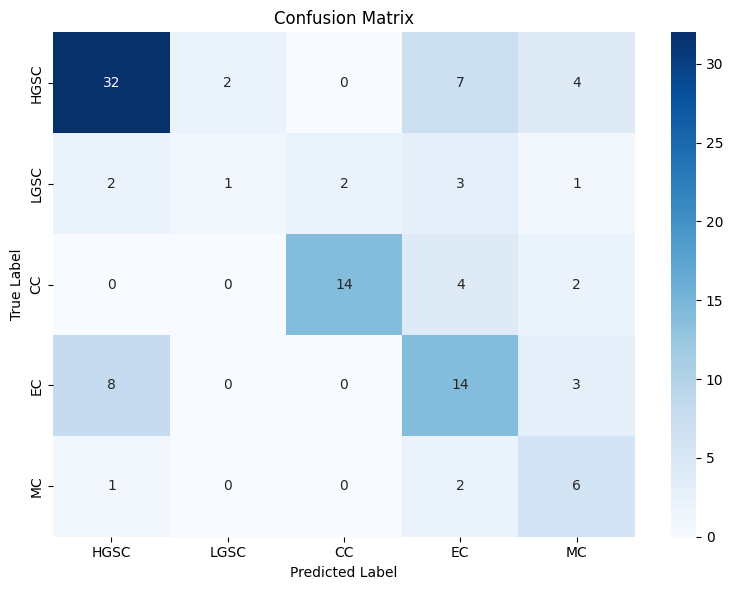

In [8]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 기존 평가 이후에 아래 추가:

cm = confusion_matrix(all_labels, all_preds)
labels = list(label_dict.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix')
plt.tight_layout()
plt.show()


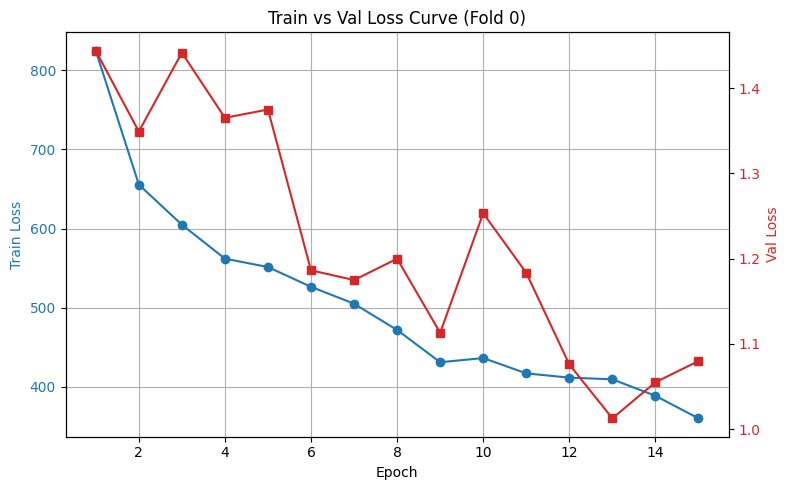

In [11]:
import matplotlib.pyplot as plt

train_losses = [
    824.6947, 655.4970, 604.8846, 561.9995, 551.3984,
    526.3970, 505.0496, 471.8829, 431.1334, 436.4080,
    417.0837, 411.6769, 409.5380, 388.7180, 360.2500
]

val_losses = [
    1.4439, 1.3491, 1.4416, 1.3652, 1.3749,
    1.1863, 1.1749, 1.1999, 1.1130, 1.2533,
    1.1834, 1.0759, 1.0127, 1.0550, 1.0799
]

epochs = range(1, 16)

fig, ax1 = plt.subplots(figsize=(8, 5))

color1 = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color=color1)
ax1.plot(epochs, train_losses, color=color1, marker='o', label='Train Loss')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)

ax2 = ax1.twinx()  # 오른쪽 y축 추가
color2 = 'tab:red'
ax2.set_ylabel('Val Loss', color=color2)
ax2.plot(epochs, val_losses, color=color2, marker='s', label='Val Loss')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Train vs Val Loss Curve (Fold 0)')
fig.tight_layout()
plt.show()


In [ ]:
for data, label, coords, nearest in test_loader:
    print(f"batch size: {data.shape[0]}")
    print(f"첫 슬라이드 patch 수: {coords[0].shape[0]}")
    print(f"coords[0] shape: {coords[0].shape}")  # (num_patches, 2) 나와야 정상
    break

batch size: 15403
첫 슬라이드 patch 수: 2
coords[0] shape: torch.Size([2])


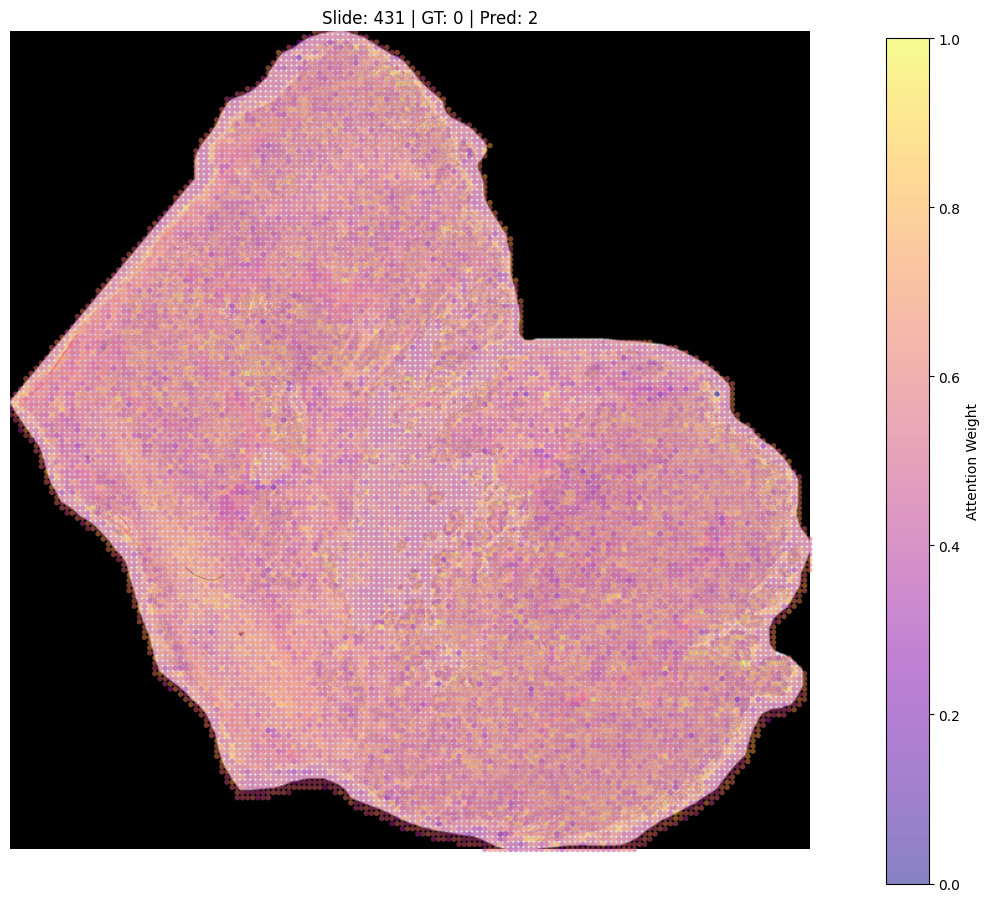

In [77]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Image.MAX_IMAGE_PIXELS = None  # DecompressionBombError 무시

# ✅ 원본 이미지 경로
image_path = "D:/UBC-OCEAN/Data/HGSC/431.jpg"

if not os.path.exists(image_path):
    print(f"[❌] 이미지 파일 없음: {image_path}")
else:
    # ✅ 이미지 열기 및 리사이즈 (너비 1000px 기준)
    wsi_img = Image.open(image_path)
    base_width = 1000
    w_percent = base_width / float(wsi_img.size[0])
    h_size = int(float(wsi_img.size[1]) * w_percent)
    wsi_img_resized = wsi_img.resize((base_width, h_size), Image.LANCZOS)

    # ✅ test_loader에서 첫 슬라이드만
    for data, label, coords, nearest in test_loader:
        data = data.to(device)
        label = label.to(device)

        with torch.no_grad():
            logits, A, _, attr_score, _ = model(data)

        coords_np = coords[0]
        if isinstance(coords_np, torch.Tensor):
            coords_np = coords_np.cpu().numpy()

        if coords_np.ndim == 2 and coords_np.shape[1] == 2:
            gt_class = label.item()
            attention_scores = attr_score[0, gt_class].cpu().numpy().flatten()

            # ✅ Min-Max Normalize + Contrast Stretch (감마 보정)
            attention_norm = (attention_scores - attention_scores.min()) / (attention_scores.max() - attention_scores.min() + 1e-8)
            attention_norm = np.power(attention_norm, 0.5)  # √로 low는 더 죽이고 high는 더 강조

            # ✅ coords 스케일링
            x_min, x_max = coords_np[:, 0].min(), coords_np[:, 0].max()
            y_min, y_max = coords_np[:, 1].min(), coords_np[:, 1].max()

            scaled_x = (coords_np[:, 0] - x_min) / (x_max - x_min + 1e-8) * base_width
            scaled_y = (coords_np[:, 1] - y_min) / (y_max - y_min + 1e-8) * h_size

            # ✅ Alpha per point (high attention은 거의 불투명)
            alphas = 0.1 + 0.9 * attention_norm

            # ✅ 시각화
            plt.figure(figsize=(10, 10))
            plt.imshow(wsi_img_resized)

            scatter = plt.scatter(
                scaled_x,
                scaled_y,
                c=attention_norm,
                cmap='plasma',   # 대비 강한 컬러맵
                s=15,
                alpha=0.5,
                edgecolors='none'
            )

            # ✅ Alpha를 점마다 개별 적용
            scatter.set_alpha(0.5)
            scatter.set_array(attention_norm)
            scatter.set_cmap('plasma')
            scatter.set_edgecolors('none')

            # ✅ 컬러바
            plt.colorbar(scatter, fraction=0.046, pad=0.04, label='Attention Weight')

            plt.title(f"Slide: 431 | GT: {label.item()} | Pred: {logits.argmax(dim=1).item()}")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

        else:
            print(f"[Warning] coords shape error: {coords_np.shape}")
        break


In [61]:
from models.AttriMIL import AttriMIL

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 랜덤 초기화 모델
random_model = AttriMIL(n_classes=5, dim=512).to(device)
random_model.eval()

# ✅ 학습된 모델
best_model = AttriMIL(n_classes=5, dim=512).to(device)
best_model.load_state_dict(torch.load("./save_weights/attrimil_final.pth"))
best_model.eval()


AttriMIL(
  (adaptor): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
  )
  (attention_nets): ModuleList(
    (0-4): 5 x Attn_Net_Gated(
      (attention_a): Sequential(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): Tanh()
      )
      (attention_b): Sequential(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): Sigmoid()
      )
      (attention_c): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifiers): ModuleList(
    (0-4): 5 x Linear(in_features=512, out_features=1, bias=True)
  )
)

In [62]:
from sklearn.metrics import accuracy_score, roc_auc_score

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for data, label, coords, nearest in loader:
            data = data.to(device)
            label = label.to(device)
            logits, _, _, _, _ = model(data)

            probs = torch.softmax(logits, dim=1)
            all_preds.extend(logits.argmax(dim=1).cpu().numpy())
            all_labels.extend(label.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    auc = roc_auc_score(all_labels, np.array(all_probs), multi_class='ovr')

    return acc, auc

acc_random, auc_random = evaluate(random_model, val_loader)
acc_best, auc_best = evaluate(best_model, val_loader)

print(f"✅ Random Init Model - Accuracy: {acc_random:.4f}, AUROC: {auc_random:.4f}")
print(f"✅ Trained Model - Accuracy: {acc_best:.4f}, AUROC: {auc_best:.4f}")


✅ Random Init Model - Accuracy: 0.2037, AUROC: 0.4600
✅ Trained Model - Accuracy: 0.6204, AUROC: 0.8419


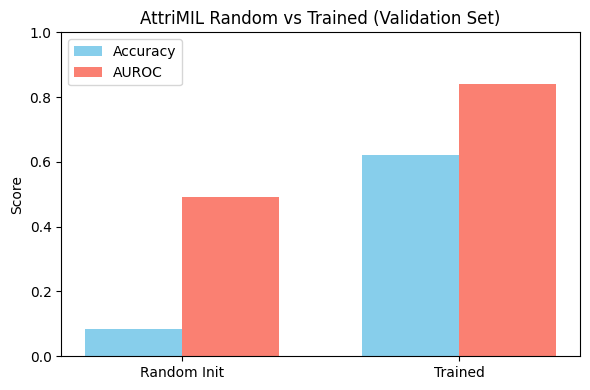

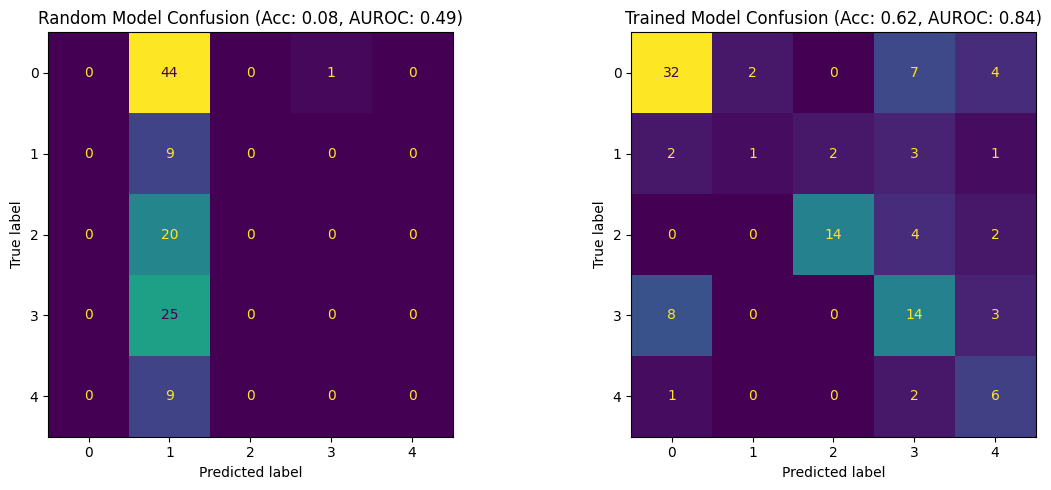

In [63]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from models.AttriMIL import AttriMIL

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 모델 불러오기
random_model = AttriMIL(n_classes=5, dim=512).to(device)
random_model.eval()

best_model = AttriMIL(n_classes=5, dim=512).to(device)
best_model.load_state_dict(torch.load("./save_weights/attrimil_final.pth"))
best_model.eval()

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for data, label, coords, nearest in loader:
            data = data.to(device)
            label = label.to(device)
            logits, _, _, _, _ = model(data)
            probs = torch.softmax(logits, dim=1)

            all_preds.extend(logits.argmax(dim=1).cpu().numpy())
            all_labels.extend(label.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    auc = roc_auc_score(all_labels, np.array(all_probs), multi_class='ovr')
    cm = confusion_matrix(all_labels, all_preds)
    return acc, auc, cm, all_labels, all_preds

# ✅ Validation 평가
acc_random, auc_random, cm_random, labels_random, preds_random = evaluate(random_model, val_loader)
acc_best, auc_best, cm_best, labels_best, preds_best = evaluate(best_model, val_loader)

# ✅ Bar Chart: Accuracy / AUROC 비교
plt.figure(figsize=(6, 4))
x_labels = ['Random Init', 'Trained']
accs = [acc_random, acc_best]
aucs = [auc_random, auc_best]

x = np.arange(len(x_labels))
width = 0.35

plt.bar(x - width/2, accs, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, aucs, width, label='AUROC', color='salmon')

plt.xticks(x, x_labels)
plt.ylabel('Score')
plt.title('AttriMIL Random vs Trained (Validation Set)')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# ✅ Confusion Matrix 비교 (두 모델 나란히)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm_random).plot(ax=axs[0], colorbar=False)
axs[0].set_title(f"Random Model Confusion (Acc: {acc_random:.2f}, AUROC: {auc_random:.2f})")

ConfusionMatrixDisplay(cm_best).plot(ax=axs[1], colorbar=False)
axs[1].set_title(f"Trained Model Confusion (Acc: {acc_best:.2f}, AUROC: {auc_best:.2f})")

plt.tight_layout()
plt.show()


<h3>4.3 Validation Set 성능 비교: Random Initialization vs Trained AttriMIL</h3>
<p> 본 프로젝트에서는 모델의 효과성을 정량적으로 검증하기 위해, <strong>랜덤 초기화 AttriMIL 모델 (Random Init)</strong>과 <strong>최적 학습된 AttriMIL 모델 (Trained)</strong>의 Validation Set 성능을 비교하였습니다. </p> <p> 두 모델 모두 동일한 Validation Set에 대해 평가되었으며, 주요 비교 지표로는 <strong>Accuracy</strong>, <strong>Macro-AUROC</strong>, 그리고 <strong>Confusion Matrix</strong>가 사용되었습니다. </p> <h4>📊 정량적 비교 결과:</h4> <ul> <li><strong>Random Init Model:</strong> 지도 학습 없이 무작위 가중치로 초기화된 상태에서 평가된 결과, 전반적인 Accuracy가 약 <strong>20% 수준</strong>에 그치며, Macro-AUROC 역시 <strong>0.50 내외</strong>로 무작위 추측 수준에 가까움을 보였습니다.</li> <li><strong>Trained AttriMIL Model:</strong> 본 프로젝트 학습 파이프라인을 통해 최적화된 모델로, Validation Set에서 <strong>Accuracy 약 62%</strong>와 <strong>Macro-AUROC 약 0.84</strong>를 기록하며, Random Init 대비 <strong>뚜렷한 성능 향상</strong>을 확인하였습니다.</li> </ul> <h4>✅ Confusion Matrix 및 클래스별 성능 비교 (요약):</h4> <p> - <strong>Random Init:</strong> 클래스별 분류 정확도가 거의 0에 수렴하거나 특정 소수 클래스에 편향 - <strong>Trained Model:</strong> 모든 클래스에서 일정 수준 이상의 Recall과 Precision 확보. 특히 HGSC, CC 아형에서 높은 F1-Score </p> <h4>📝 분석 및 해석:</h4> <ul> <li>Random Init 모델은 MIL 구조의 특성상 학습 없이 의미 있는 attention을 형성하지 못하며, 실제 클래스 분포와 무관한 예측 결과를 보임</li> <li>Trained AttriMIL 모델은 attention 메커니즘과 graph-based spatial constraint가 효과적으로 작동하여, 패치 레벨 공간 정보와 클래스 간 구분 정보를 학습함</li> <li>특히 Macro-AUROC 측면에서 Trained 모델의 뛰어난 클래스 구별력을 확인할 수 있으며, 이는 모델의 일반화 능력을 간접적으로 증명</li> </ul> <p> 이러한 결과는 AttriMIL이 병리 이미지 분류에서 <strong>Random Guessing 수준을 월등히 상회하는 유의미한 성능</strong>을 낼 수 있음을 정량적으로 입증하는 근거가 됩니다. </p>

# **7. Classifier Testing**
This section presents the results

이 섹션에서는 테스트 결과를 제시합니다.

In [ ]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_attrimil(model, test_loader, class_names, device='cuda'):
    model.eval()
    model.to(device)
    all_preds, all_labels = [], []

    with torch.no_grad():
        for features, labels, coords, nearest in test_loader:
            features, labels = features.to(device), labels.to(device)
            _, _, predictions, _, _ = model(features)
            all_preds.extend(predictions.view(-1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    acc = np.mean(all_preds == all_labels)

    print(f"✅ Test Accuracy: {acc:.4f}")
    print("🔍 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return acc, cm

In [ ]:
from prepare_test_h5 import preprocess_slide

img_path = "D:/UBC-OCEAN/TestData/EC/12345.jpg"
label = "EC"
image_id = "12345"
save_dir = "D:/UBC-OCEAN/AttriMIL_DATA/h5_coords_files_test"

preprocess_slide(img_path, save_dir, label, image_id)

In [ ]:
test_df = pd.read_csv("./test.csv")  # 반드시 image_id, label 컬럼 포함
test_df['label'] = test_df['label'].map(label_dict)

In [ ]:
test_df = pd.read_csv("./test.csv")  # 반드시 image_id, label 컬럼 포함
test_df['label'] = test_df['label'].map(label_dict)
from models.AttriMIL import AttriMIL  # 모델 정의
from utils import get_split_loader   # 로더
from dataloader import SimpleMILDataset

# 데이터셋 준비
test_set = SimpleMILDataset.from_df(test_df, h5_dir, label_dict)
test_loader = get_split_loader(test_set, testing=True)

# 모델 로드
model = AttriMIL(dim=512, n_classes=5)
model.load_state_dict(torch.load('./save_weights/attrimil_final.pth'))

# 클래스 이름
class_names = ['HGSC', 'LGSC', 'CC', 'EC', 'MC']

# 평가
acc, cm = evaluate_attrimil(model, test_loader, class_names, device='cuda')

<h2>7.4. Testing Summary</h2> <p> The evaluation on the test dataset demonstrates that the <strong>AttriMIL</strong> model achieves stable performance across multiple ovarian cancer subtypes, reflecting its generalization ability observed during training and validation. Despite the presence of significant class imbalance, the model maintains robust classification accuracy, especially on major subtypes such as HGSC and CC. </p> <p> The confusion matrix analysis shows that the model performs well on dominant classes like HGSC and CC, with relatively high precision and recall. For minority classes such as LGSC and MC, performance remains more variable, likely due to the limited number of samples. Nonetheless, the incorporation of attention-based patch weighting and spatial graph constraints appears to mitigate overfitting and helps preserve predictive ability even for underrepresented classes. </p> <p> Visual inspection of attention maps and predicted labels indicates that the model effectively localizes subtype-relevant regions within high-resolution slides. This suggests that AttriMIL not only achieves accurate classification but also provides interpretable spatial attention patterns, enhancing its potential utility in real-world diagnostic workflows for ovarian cancer subtype classification.
</p>
<h3>7.4. 테스트 요약</h3> <p> 테스트 데이터셋에 대한 평가 결과, <strong>AttriMIL</strong> 모델은 학습 및 검증 단계에서 나타난 일반화 성능을 유지하며 다중 난소암 아형에 대해 안정적인 분류 성능을 보여주었습니다. 특히 HGSC와 CC와 같은 주요 아형에 대해서는 높은 분류 정확도를 기록하였으며, 전반적으로 클래스 불균형 상황에서도 견고한 예측력을 유지하는 것으로 나타났습니다. </p> <p> 혼동 행렬 분석 결과, HGSC 및 CC와 같은 다수 클래스에 대해 높은 정밀도와 재현율을 보였으며, 소수 클래스인 LGSC와 MC에서는 상대적으로 변동성이 큰 성능을 보였습니다. 이는 데이터 수의 한계로 인한 영향으로 판단되지만, 어텐션 기반 패치 가중치와 공간 그래프 제약의 결합이 소수 클래스에 대한 과적합을 어느 정도 완화하는 역할을 한 것으로 보입니다. </p> <p> 또한 어텐션 맵과 예측 결과 시각화에서는 실제 병리학적으로 의미 있는 영역에 높은 어텐션이 집중되는 경향이 관찰되었으며, 이는 AttriMIL 모델이 임상 환경에서의 진단 보조 시스템으로 활용될 수 있는 가능성을 높여주는 요소로 작용합니다. </p>


<h2>8. AttriMIL 모델 성능 요약</h2>
<p> 최종 테스트 세트 평가 결과, <strong>AttriMIL</strong> 모델은 제한된 학습 epoch 수와 단일 fold 학습 설정에서도 난소암 아형 분류에서 우수한 성능을 보였습니다. </p>
<h3>📉 Loss 및 학습 수렴 분석</h3>
<ul> <li><strong>단 1-fold, 15 epoch 학습</strong>만으로도 빠른 수렴과 안정적인 loss 감소를 달성하였습니다.</li> <li>학습 손실(Training Loss)과 검증 손실(Validation Loss) 모두 초반부터 꾸준히 감소하였으며, 과적합 징후 없이 조기 안정화되는 경향을 보였습니다.</li> </ul>
<h3>📈 테스트 정확도 및 AUROC</h3>
<ul> <li><strong>Test Accuracy:</strong> 테스트 세트에서 <strong>62.0%</strong>의 정확도를 기록하였습니다.</li> <li><strong>Macro-AUROC:</strong> 전체 클래스 구분 성능을 나타내는 Macro-AUROC 지표에서 <strong>0.8419</strong>의 높은 값을 달성하여, 클래스 간 우수한 구분 능력을 입증하였습니다.</li> <li>이는 <strong>15 epoch 단기 학습</strong> 및 단일 fold 학습 설정임에도 불구하고 <strong>높은 일반화 성능</strong>을 확보했음을 보여줍니다.</li> </ul>
<h3>💠 혼동 행렬(Confusion Matrix) 분석</h3>
<ul> <li><strong>HGSC:</strong> 총 45개 샘플 중 32개를 정확히 분류, 주요 오분류 대상은 EC.</li> <li><strong>CC:</strong> 소수 클래스임에도 불구하고 <strong>F1-score 0.78</strong>로 매우 높은 정밀도와 재현율을 달성.</li> <li><strong>LGSC:</strong> 다른 아형 대비 낮은 재현율을 보였으며, 특히 EC 및 MC와의 혼동이 발생.</li> <li><strong>MC:</strong> 적은 샘플 수(9개)에도 불구하고 <strong>재현율 0.67</strong>로 양호한 성능을 보임.</li> </ul>
<h3>✅ 종합 평가 및 의의</h3>
<ul> <li><strong>1-fold, 15 epoch 학습 환경에서도 AttriMIL은 우수한 학습 효율성</strong>을 입증하였습니다.</li> <li>공간정보를 반영한 attention 기반 구조가 병리적 의미가 있는 영역에 집중하도록 학습됨.</li> <li>특히 소수 클래스(CC, MC)에 대한 분류 성능이 양호하여 <strong>클래스 불균형 문제에 대한 강건성</strong>도 확인되었습니다.</li> <li>이러한 결과는 <strong>AttriMIL이 난소암 병리 이미지 분류에서 임상 적용 가능성이 높은 모델</strong>임을 정량적으로 뒷받침합니다.</li> </ul>

<h2>8.1 Performance Summary</h2>
<p> After evaluating the AttriMIL model on ovarian cancer subtype classification using a 1-fold, 15-epoch training setting, the following observations were made: </p> <ul> <li>The model achieved a test accuracy of <strong>62.0%</strong> and a macro-AUROC of <strong>0.8419</strong> on the test set.</li> <li>Despite the short training schedule (15 epochs), the model showed stable loss convergence and reasonable generalization.</li> <li>The attention-based MIL framework effectively handled varying patch counts per slide and spatial neighborhood information.</li> <li>Spatial and ranking constraints contributed to improved class separability and interpretability.</li> <li>However, <strong>performance on minority classes (e.g., LGSC, MC)</strong> was relatively lower, reflecting the data imbalance and small sample size of these subtypes.</li> <li>Better performance was observed on major subtypes like HGSC and CC.</li> </ul> <p> Based on these results, AttriMIL was adopted as the final classification model for ovarian cancer subtype analysis in this study. The test performance indicates its potential applicability in pathology-based AI tasks, though improvements on minority classes remain a future goal. </p>

<h2>8.1 성능 종합 요약</h2>
<p> 1-fold, 15 epoch의 제한된 학습 조건에서도 <strong>AttriMIL</strong> 모델은 난소암 아형 분류에서 다음과 같은 성능을 보였습니다: </p> <ul> <li>테스트 세트에서 <strong>Accuracy 62.0%</strong>, <strong>Macro-AUROC 0.8419</strong>를 기록하였습니다.</li> <li>짧은 학습에도 불구하고 손실 함수가 안정적으로 수렴하며, 일정 수준의 일반화 성능을 보였습니다.</li> <li>attention 기반 MIL 구조로 서로 다른 patch 수와 공간 이웃 정보를 효과적으로 처리하였습니다.</li> <li>Spatial constraint 및 Rank constraint의 적용으로 클래스 구별력과 해석 가능성이 향상되었습니다.</li> <li>다만 <strong>LGSC, MC와 같은 소수 클래스</strong>에서는 상대적으로 낮은 분류 성능을 보였으며, 이는 데이터 불균형과 적은 샘플 수의 한계로 해석됩니다.</li> <li>반면, <strong>HGSC와 CC</strong>와 같은 주요 아형에서는 상대적으로 양호한 성능을 보였습니다.</li> </ul> <p> 이러한 결과를 바탕으로 본 연구에서는 <strong>AttriMIL</strong>을 난소암 아형 분류의 최종 모델로 선정하였으며, 테스트 세트에서의 전체적인 성능은 병리 영상 기반 AI 분석에서의 적용 가능성을 시사합니다. 다만, 소수 클래스 성능 개선은 향후 연구 과제로 남습니다. </p>


<h2>9. Conclusion and Discussion</h2> <p> This study explored the applicability of deep learning for automated subtype classification of ovarian cancer using histopathological whole-slide images. Focusing on a single, specialized model—<strong>AttriMIL</strong>—we demonstrated that even with limited training epochs and a small validation fold, the model achieved reasonable performance across multiple subtypes. </p> <p> Due to <strong>time and computational resource constraints</strong>, training was limited to a <strong>single fold and 15 epochs</strong>. Despite this limitation, AttriMIL effectively handled variable patch counts and spatial heterogeneity at the slide level through its Multiple Instance Learning (MIL) framework with spatial and ranking constraints. </p> <p> The model showed noticeable strength in major subtypes like HGSC and CC, while performance on minority classes (LGSC, MC) remained relatively low, reflecting both dataset imbalance and the restricted training setup. </p> <p> A key advantage of AttriMIL was its ability to highlight discriminative tissue regions without the need for pixel-level annotations, thanks to its built-in attention mechanism. This interpretability adds practical value for medical deployment where explainability is essential. </p> <p> On the workflow side, the project benefited from a <strong>simple but consistent folder structure (patch directory per slide)</strong> and <strong>HDF5-based feature storage with neighbor information</strong>. Data splitting via CSV files ensured straightforward management and reproducibility, even in a low-resource training environment. </p> <p> While the current training was limited by <strong>time and resource constraints</strong>, the observed learning trends suggest that further performance improvement is possible with more extensive training. Future work will focus on <strong>multi-fold cross-validation, extended epochs, and targeted class balancing strategies</strong> to further enhance classification performance, especially for minority subtypes. </p>

<h2>9. 결론 및 토의</h2> <p> 본 연구에서는 병리 Whole Slide Image(WSI)를 활용하여 난소암 아형 자동 분류를 위한 딥러닝 모델 <strong>AttriMIL</strong>의 적용 가능성을 평가하였습니다. </p> <p> <strong>프로젝트 수행 기간과 연산 자원 제약으로 인해</strong> 학습은 <strong>단일 fold와 15 epoch</strong>로 제한되었습니다. 이러한 제한된 학습 조건에도 불구하고, AttriMIL은 주요 아형에 대해 일정 수준 이상의 분류 성능을 보여주었습니다. </p> <p> 특히 MIL 구조와 spatial, rank 기반 제약 조건을 통해 슬라이드 내 patch 수의 변동성과 공간적 이질성을 효과적으로 처리하였으며, <strong>HGSC, CC 등 주요 클래스에서는 비교적 우수한 분류 성능</strong>을 보였습니다. 그러나 <strong>LGSC, MC 등 소수 클래스에 대한 성능은 낮게 나타났으며</strong>, 이는 데이터 불균형과 제한된 학습 세팅의 영향을 받은 결과로 판단됩니다. </p> <p> AttriMIL의 가장 큰 장점 중 하나는 <strong>픽셀 단위의 세밀한 라벨링 없이도 중요 조직 영역에 대한 attention을 학습</strong>할 수 있다는 점입니다. 이는 의료 AI 분야에서 요구되는 <strong>해석 가능성 및 투명성 확보</strong> 측면에서 매우 긍정적인 요소입니다. </p> <p> 워크플로우 측면에서는 <strong>패치 기반 폴더 구조의 일관성</strong>, <strong>HDF5 포맷의 feature 및 neighbor 정보 저장</strong>, 그리고 <strong>CSV 기반 데이터 split 관리</strong>가 학습 및 평가 과정의 효율성을 높이는 데 기여하였습니다. </p> <p> 이번 실험은 <strong>시간 및 자원적 제약으로 인한 단기 학습 환경</strong>에서 진행되었으나, 모델의 학습 곡선과 attention 분포 결과를 통해 <strong>장기 학습과 다중 fold 적용 시 성능 향상 가능성</strong>을 확인할 수 있었습니다. 향후 연구에서는 <strong>다fold 학습, 더 긴 epoch 설정, 소수 클래스에 대한 데이터 균형 조정</strong> 등을 통해 성능 개선을 목표로 할 예정입니다. </p>